## Task 1

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('dat.csv', index_col=0)

In [10]:
# Standardize the dataset
standard_df = (df - df.mean(axis=0)) / df.std(axis=0)

In [39]:
# Transpose the dataset
transposed_standard_df = standard_df.T

In [40]:
# Obtain the covariance matrix
cov_df = np.cov(transposed_standard_df)

In [46]:
# Obtain the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_df)

In [73]:
# Obtain the component with the maximum possible variance
sorted_v = np.argsort(eigenvalues)[::-1]
feature_vector = eigenvectors[:, sorted_v[:1]]

In [114]:
# Scores
scores = standard_df.dot(feature_vector)

In [115]:
# Loadings
loadings = feature_vector.T

In [117]:
# Explained variance
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

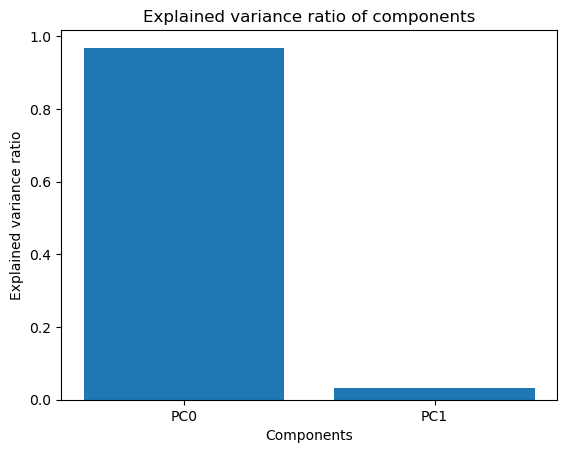

In [151]:
plt.bar(["PC{}".format(i) for i in range(2)], explained_variance_ratio)
plt.xlabel('Components')
plt.ylabel('Explained variance ratio')
plt.title('Explained variance ratio of components')
plt.show()

## Task 2

In [147]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
import warnings

In [130]:
eurodist = pd.read_csv('eurodist.csv')

In [131]:
eurodist

,city,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
0,Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
1,Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
2,Brussels,2963,1318,0,204,583,206,966,677,2256,...,2084,690,1558,1011,925,747,285,1511,1616,1175
3,Calais,3175,1326,204,0,460,409,1136,747,2224,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
4,Cherbourg,3339,1294,583,460,0,785,1545,853,2047,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588
5,Cologne,2762,1498,206,409,785,0,760,1662,2436,...,2290,714,1764,1035,911,583,465,1497,1403,937
6,Copenhagen,3276,2218,966,1136,1545,760,0,1418,3196,...,2971,1458,2498,1778,1537,1104,1176,2050,650,1455
7,Geneva,2610,803,677,747,853,1662,1418,0,1975,...,1936,158,1439,425,328,591,513,995,2068,1019
8,Gibraltar,4485,1172,2256,2224,2047,2436,3196,1975,0,...,676,1817,698,1693,2185,2565,1971,2631,3886,2974
9,Hamburg,2977,2018,597,714,1115,460,460,1118,2897,...,2671,1159,2198,1479,1238,805,877,1751,949,1155


In [137]:
eurodist_arr = eurodist.iloc[:, 1:].to_numpy()

In [139]:
# Calculate pairwise distances
distances = pairwise_distances(eurodist_arr, metric='euclidean')

In [141]:
# PCoA using MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

In [149]:
# Fit to the data and transform to obtain the coordinates
coordinates = mds.fit_transform(distances)
warnings.filterwarnings('ignore')

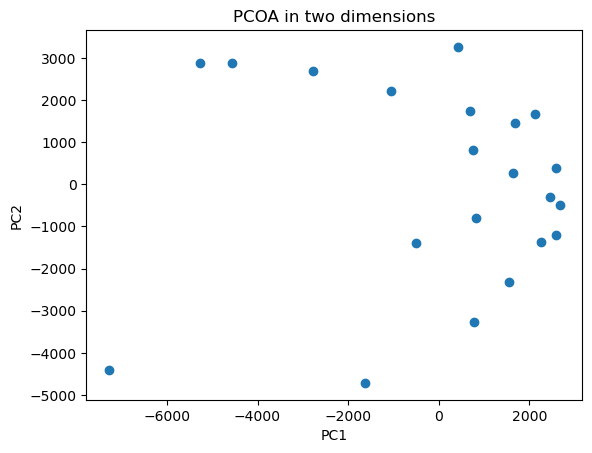

In [146]:
plt.scatter(coordinates[:, 0], coordinates[:, 1])
plt.title('PCOA in two dimensions')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## Task 3

(a).   If the distance metric is euclidean, the results of PCA and PCoA are equaivalent.

(b). The explained variance ratio can be determined for each dimension. A certain number of components (dimensions) can then be chosen if it explains a good percentage, say 90%, of the total variance.